# Função de transferência de sistemas discretos

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Definição do problema

Aqui, vamos considerar o formato geral de uma equação de diferenças de um sistema linear e invariante no tempo:

$$y[n] + a_{1}y[n-1]+...+a_Ny[n-N] = b_Mx[n-M] +...+b_2x[n-2]+b_1x[n-1] + b_0x[n] $$

Como já vimos anteriormente, a solução desta equação é formada por duas partes:

$$y[n] = y_{zi}[n] + y_{zs}[n]$$

em que $y_{zi}[n]$ é a parte de $y$ devida às condições iniciais do sinal de saída (os valores de $y[n-1], y[n-2], ..., y[n-N]$ quando $n$ = 0). Para o cálculo dessa componente, considera-se que a entrada $x[n]$ é nula ($zi$ é de *zero input*, **entrada nula** em inglês).

A outra componente, $y_{zs}[n]$, é devido à entrada $x[n]$. Para o cálculo dessa componente consideramos que os valores de $y[n-1], y[n-2], ..., y[n-N]$ quando $n$ = 0 são todos iguais a 0 ($zs$ é de *zero state*, **estado nulo** em inglês, às vezes também chamado de **repouso**).

Vamos agora encontrar essas duas partes da solução utilizando transformada Z. É consideravelmente mais simples do que o método clássico.

## Resposta de estado nulo



Como já vimos anteriormente, a transformada Z de $x[n-m]$ é:

$\mathcal{Z}(x[n-m]) = z^{-m}X(z)$

e a transformada Z de $y[n-m]$ é:

$\mathcal{Z}(y[n-m]) = z^{-m}Y(z)$

Substituindo essas transformadas dos sinais atrasado na equação de diferenças, temos:

$$Y(z) + a_{1}z^{-1}Y(z)+...+a_Nz^{-N}Y(z) = b_Mz^{-M}X(z) +...+b_2z^{-2}X(z)+b_1z^{-1}X(z) + b_0X(z) $$

Com isso, podemos definir a função $H(z)$:

$H(z) = \frac{Y(z)}{X(z)} = \frac{b_Mz^{-M} +...+b_2z^{-2}+b_1z^{-1} + b_0}{1 + a_{1}z^{-1}+...+a_Nz^{-N}}$

Essa função é conhecida como **função de transferência** do sistema. Ela é obtida diretamente dos coeficientes da equação de diferenças.

---

### Exemplo 1

Vamos considerar o sistema com a seguinte equação de diferenças:

$y[n] + 3y[n-1] - 4y[n-2] = 3x[n] + x[n-1]$

A função de transferência deste sistema é:

$H(z) = \frac{3+z^{-1}}{1 + 3z^{-1}-4z^{-2}}$

---

---

### Exemplo 2

Vamos considerar o sistema com a seguinte equação de diferenças:

$y[n]  = -0.5y[n-1] + x[n]$

A função de transferência deste sistema é:

$H(z) = \frac{1}{1 + 0.5z^{-1}}$

---

Observando a expressão da função de transferência, vemos que se $X(z) = 1$, $Y(z) = H(z)$. O sinal $x[n]$ que tem uma transformada Z igual a 1 é o impulso unitário ($x[n]=\delta[n]$). Portanto a função de transferência é a transformada Z da resposta ao impulso.

$H(z) = \displaystyle\sum_{n=0}^\infty h(n)z^{-n}$

---

### Exemplo 3

A resposta ao impulso do sistema do exemplo 2 é:

$h[n] = (-0.5)^nu[n]$

A transformada Z dessa resposta ao impulso é:

$H(z) = \displaystyle\sum_{n=0}^\infty  (-0.5)^nu[n] z^{-n}= \displaystyle\sum_{n=0}^\infty  (-0.5)^nz^{-n} = \displaystyle\sum_{n=0}^\infty  (-0.5z^{-1})^n = \frac{1}{1 + 0.5z^{-1}}=\frac{z}{z+0.5}$

Como esperado, a função encontrada foi a mesma do exemplo 2.

---

A partir da expressão da função de transferência, chegamos à expressão para $Y(z)$:

$H(z) = \frac{Y(z)}{X(z)} \rightarrow Y(z) = H(z)X(z)$

Também podemos chegar a essa expressão pela propriedade da convolução da transformada Z:

$y[n] = h[n]*x[n] \rightarrow Y(z) = H(z)X(z)$

Tendo $Y(z)$, basta calcular a sua transformada inversa para encontrar $y[n]$.

---

### Exemplo 4

Vamos considerar o mesmo sistema do exemplo 2 e encontrar o sinal de saída quando a entrada é um degrau.

$x[n] = u[n]$

A sua transformada Z é:

$X(z) = \frac{z}{z-1}$

Então, a transformada Z do sinal de saída é:

$Y(z) = H(z)X(z) = \frac{1}{1 + 0.5z^{-1}}\frac{z}{z-1} = \frac{z}{z-0.5-0.5z^{-1}} = \frac{z^2}{z^2-0.5z-0.5}=\frac{z^2}{(z+0.5)(z-1)}$

Expandindo $Y'(z)=\frac{Y(z)}{z}$ em frações parciais:

$Y'(z) = H(z)X(z) = \frac{1}{1 + 0.5z^{-1}}\frac{z}{z-1} = \frac{z}{z-0.5-0.5z^{-1}} = \frac{z^2}{z^2-0.5z-0.5}=\frac{z}{(z+0.5)(z-1)} = \frac{A_1}{z+0.5} + \frac{A_2}{z-1}$

Com

$A_1 = \left.\frac{z}{z-1}\right|_{z=-0.5}=0.333$ e $A_2=\left.\frac{z}{z+0.5}\right|_{z=1}=0.67$

Então $Y(z) = Y'(z)z$ é:

$Y(z) = \frac{0.33z}{z+0.5} + \frac{0.67z}{z-1}$

Com a transformada Z inversa de $Y(z)$, chegamos ao sinal de saída do sistema:

$y[n] = 0.33(-0.5)^nu[n] + 0.67u[n]$

Abaixo é mostrado o gráfico do sinal.

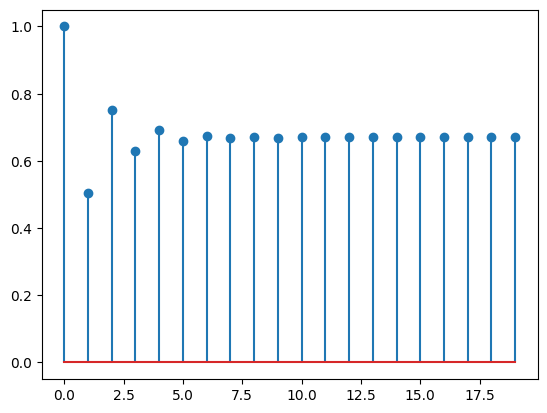

In [ ]:
n = np.arange(20)
y = 0.33*(-0.5)**n+0.67
plt.stem(n, 0.33*(-0.5)**n+0.67);

No caso de sistemas de tempo discreto, é simples achar os valores da saída de forma recursiva. Isso é uma boa maneira de verificar se a expressão encontrada está correta.

<StemContainer object of 3 artists>

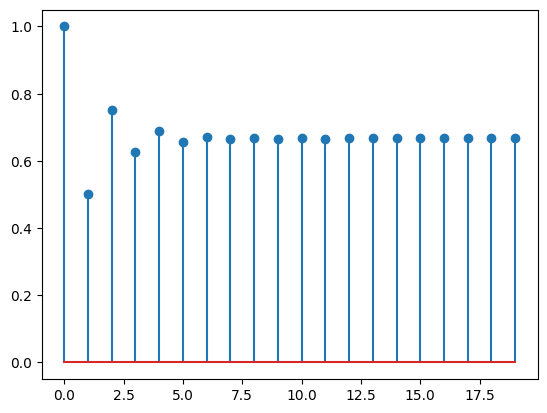

In [ ]:
N = 20
x = np.ones(N)
y = np.zeros(N)

for n in range(N):
    y[n] = -0.5*y[n-1]+x[n]
plt.stem(y)

O gráfico é o mesmo quando foi utilizada a expressão encontrada fazendo a transformada Z inversa.

---

## Resposta de entrada nula

Na resposta de entrada nula, considera-se que não existe entrada. Dessa maneira, a equação de diferenças fica:

$y[n] + a_{1}y[n-1] + ... + a_Ny[n-N] = 0$

Aqui, vamos considerar as condições iniciais. A transformada Z de $y[n-M]$ quando existem condições iniciais no sinal $y[n]$ é:

$\mathcal{Z}(y[n-M]) = z^{-M}Y(z) + z^{-M}\displaystyle\sum_{k=1}^M y[-k]z^k$

Fazendo essa substituição na equação de diferenças, é possível obter a resposta de entrada nula.


---

### Exemplo 5

Vamos considerar o sistema do exemplo 1, com a seguinte equação de diferenças:

$y[n] + 3y[n-1] - 4y[n-2] = 3x[n] + x[n-1]$

$y[-1] = 1$ e $y[-2] = -1$ e um sinal de entrada $x[n] = \mathrm{sen}\left(\frac{\pi}{3}n\right)u[n]$

Primeiro, vamos encontrar a resposta de entrada nula. Então, a transfromada Z da resposta de entrada nula:

$Y_{zi}(z) + 3z^{-1}Y_{zi}(z) + 3y[-1]  - 4z^{-2}Y_{zi}(z) - 4(y[-2] + z^{-1}y[-1]) = 0$

$Y_{zi}(z) = \frac{-3y[-1]+4y[-2]+4z^{-1}y[-1]}{1 + 3z^{-1}- 4z^{-2}} = \frac{-7+4z^{-1}}{1 + 3z^{-1}- 4z^{-2}}=\frac{-7z^2+4z}{z^2 + 3z- 4z} = \frac{-7z^2+4z}{(z+4)(z-1)}$

Agora, fazemos a expansão em frações parciais de $Y'(z) = Y(z)/z$:


$Y_{zi}(z) = \frac{-7z^2+4z}{z(z+4)(z-1)} = \frac{-7z+4}{(z+4)(z-1)} = \frac{A_1}{z+4}+\frac{A_2}{z-1}$

$A_1 = \left.\frac{-7z+4}{z-1}\right|_{z=-4} = 4.8$ e $A_2 = \left.\frac{-7z+4}{z+4}\right|_{z=1} = -0.6$

Agora, conseguimos encontrar $y_{zi}[n]$:

$Y_{zi}(z) = \frac{4.8z}{z+4}-\frac{0.6z}{z-1} \rightarrow y_{zi}[n] = 4.8(-4)^n u[n] -0.6$



---

## Associações em série e  paralelo de sistemas

Uma outra maneira de representar um sistema no diagrama de blocos é colocando a sua função de transferência dentro do bloco

Abaixo, estão duas associações bem comuns de sistemas. Em paralelo e em série.

Em paralelo, a função de transferência do sistema resulatante é a soma das funções de transferência de cada subsistema.

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/distributivaTFdisc.png?raw=1 width="600">


Em série, a função de transferência do sistema resultante é a multiplicação das funções de transferência de cada subsistema.

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/associativaTFdisc.png?raw=1 width="500">

## Diagrama de blocos

Com o conceito de transformada Z, podemos agora introduzir uma nova forma, muito mais utilizada, de representar um atraso no diagrama de blocos.

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/delayzdisc.png?raw=1 width="300">

Com a transformada Z é muito mais fácil obter a equação de diferenças a partir do diagrama de blocos. Basta substituir os sinais por suas transformadas e lembrar que a convolução no domínio do tempo é uma multiplicação no domínio da frequência.

---

### Exemplo 6

Considere o seguinte diagrama de blocos:

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/diagexemploZ.png?raw=1 width="550">

Podemos chamar o resultado do somador à esquerda de $w[n]$. A sua transformada Z é $W(z)$, que é igual a:

$W(z) = X(z) + 0.3z^{-1}W(z)-0.5z^{-2}W(z) \rightarrow W(z) = \frac{X(z)}{1-0.3z^{-1}+0.5z^{-2}}$

E agora,  $Y(z)$ é:

$Y(z) = 0.1W(z) - 0.3z^{-1}W(z) = \frac{(0.1 - 0.3z^{-1})X(z)}{1-0.3z^{-1}+0.5z^{-2}}$

Então:

$(1-0.3z^{-1}+0.5z^{-2})Y(z) = ( 0.1 - 0.3z^{-1})X(z) \rightarrow y[n]-0.3y[n-1]+0.5y[n-2] = 0.1x[n]-0.3x[n-1]$

Seria muito difícil obter a equação de diferenças sem a transformada Z.

---

Para obter o diagrama de blocos a partir da função de transferência, basta dividir a função de transferência como:

$H(z) = \frac{num(z)}{den(z)} = \frac{1}{den(z)}num(z)$



Isso é como se tivéssemos dois sistemas em série. O primeiro sistema não contém nenhuma derivada da entrada, então fazer o seu diagrama de blocos é trivial. O segundo sistema vai pegar a saída do primeiro sistema e suas derivadas.

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/numdendiagdisc.png?raw=1 width="600">

---

### Exemplo 7

Considere um sistema com a seguinte equação de diferenças:

$$y[n] = -3y[n-1] + y[n-2] + 2x[n-1] + x[n-2]$$

A sua função de transferência é:

$H(z) = \frac{2z^{-1}+z^{-2}}{1+3z^{-1}-z^{-2}} = \frac{1}{1+3z^{-1}-z^{-2}}(2z^{-1}+z^{-2})$

A equação de diferenças do primeiro sistema é:

$$y[n] = -3y[n-1] + y[n-2] + x[n]$$

Que tem o seguinte diagrama de blocos:


<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/exemploTFdiagdisc.png?raw=1 width="400">


O segundo sistema tem a seguinte equação diferencial:

$y[n] = 2x[n-1] + x[n-2]$


<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/exemploTFdiag2disc.png?raw=1 width="500">

---

É importante enfatizar que esse é apenas um diagrama de blocos possível para o sistema. Existem diversos diagramas de blocos possíveis para um mesmo sistema.

## Polos e zeros

O valor dos polos e zeros, juntamente com o valor da função de transferência em $H(0)$ também caracterizam completamente o sistema, já que é possível construir a função de transferência a partir dessas informações.

---

### Exemplo 8

Um sistema tem os polos em -0.5 e 0.2 e zeros em -1.5. Além disso, $H(0) = 3$.

Então, a sua função de transferência é:

$H(z) = \frac{G(z+1.5)}{(z+0.5)(z-0.2)} =  \frac{G(z+1.5)}{z^2+0.3z-0.1} $

$H(0) = 3 = 15G \rightarrow G = 0.2$

Então:

$H(s) =\frac{0.2z+0.3}{z^2+0.3z-0.1}$

---

## Relação entre as diferentes representações de um sistema linear e invariante no tempo


Até agora vimos diversas  formas de representar o comportamento dinâmico de sistemas lineares e invariantes no tempo. Sempre conseguimos chegar de uma até outra


<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/relacoesHdisc.png?raw=1 width="900">

## Regime permanente e transitório

É muio comum na prática da engenharia dividir o sinal de saída em duas partes:

- **transitório**: é a parte da saída que tende a zero com o passar do tempo, como uma exponencial com parte real negativa.


- **regime permanente**: é a parte da saída que permanece até o infinito.

---

### Exemplo 9

Um sistema tem a seguinte função de transferência:

$H(z) = \frac{z}{z-0.5}$

É colocada uma entrada cossenoidal com frequência angular $\frac{2\pi}{3}$ e amplitude 1 a partir de $n=0$:

$x[n] = u[n]$

A transformada Z desse sinal é:

$X(z) = \frac{z}{z-1}$


Então, a transformada Z do sinal de saída é:

$Y(z) = \frac{z}{z-0.5}\frac{z}{z-1} = \frac{z^2}{(z-0.5)(z-1)}$

A transformada Z de $Y'(z) = \frac{Y(z)}{z}$ é:

$Y'(z) = \frac{z^2}{z(z-0.5)(z-1)} = \frac{A_1}{z-1} + \frac{A_2}{z-0.5} + \frac{A_3}{z}$

$A_1 = \frac{1}{1(0.5)} = 2 $

$A_2 = \frac{0.25}{0.5(-0.5)} = -1$

$A_3 = \frac{0}{-0.5(-1)} =0$


Então $Y(z)$ é:

$Y(z) = \frac{2z}{z-1} - \frac{z}{z-0.5}$

Então:

$y[n] = 2u[n] - 0.5^nu[n] = (2-0.5^n)u[n]$



Text(8, 2.5, 'Regime permanente')

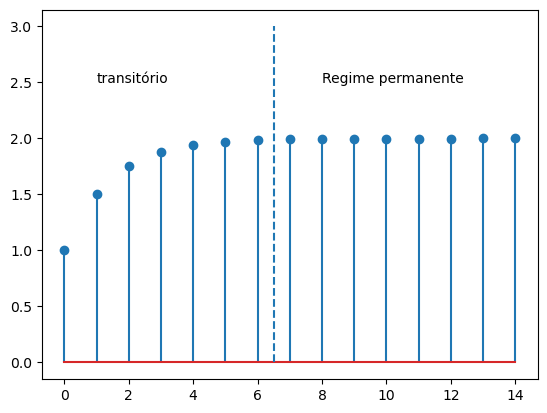

In [ ]:
n = np.arange(0, 15, 1)
y = 2 - 0.5**n
plt.stem(n, y)
plt.vlines(6.5, 0, 3, linestyle='--')
plt.text(1,2.5,'transitório')
plt.text(8, 2.5, 'Regime permanente')

No gráfico acima do sinal de saída é possível ver que até aproximadamente $n=6$ o sinal de saída ainda não chegou no comportamento final. Até $n=6$, aproximadamente, está o transitório. Depois que o transitório acaba, o sinal entra no regime permanente. O transitório é devido à exponencial e o regime permanente devido ao degrau.

---

## Exercícios



**1)** Qual é a função de transferência dos sistemas com as seguintes equações de diferenças:

a) $y[n] = 3y[n-1] + 6y[n-2] + 4x[n]$

b) $y[n] = 0.1y[n-1] + 2y[n-2] + x[n] - 0.1x[n-2]$

c) $y[n] + 5y[n-2] = x[n] + 2x[n-1]$


**2)** Qual é a saída dos sistemas seguintes para as respectivas entradas. Considere que inicialmente o sistema está em repouso:

a) $h[n] = (0.7)^nu[n]$ com $x[n] = (0.1)^nu[n]$

b)

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/diagexecTF.png?raw=1 width="300">

$x[n] = \left(\frac{2}{3}\right)^nu[n]$

c) $H(z) = \frac{z^{-1}+1}{1-0.2z^{-1}+ 0.4z^{-2}}$, com $x[n] = u[n]$


d) $y[n] + 5y[n-2] = x[n] + 2x[n-1]$, e $x[n] = nu[n]$



**3)** Encontre a saída dos sistemas com as seguintes respostas ao impulso para as respectivas entradas. Considere que inicialmente os sistemas se encontram em repouso.

a) $h[n] = 0.5^nu[n]$ e $x[n] = u[n] - u[10]$

b) $h[n] = (-0.1)^{n-1}u[n-1]$ e $x[n] = nu[n]$


**4)** Um sistema com resposta ao impulso $h[n] = 2(0.2)^{n}u[n-1]$ gera uma saída $y[n] = (-3)^nu[n-1]$. Qual a entrada que gerou essa saída?

**5)** Qual a resposta ao impulso dos seguintes sistemas:

a) $y[n] = -y[n-1] - 4y[n-2] + x[n] + 3x[n-1] + 2x[n-2]$

b) $y[n+2] + 3y[n+1] + y[n] = 2x[n+2]-3x[n+1]$

c) $y[n] = y[n-1] - 0.5y[n-2]+x[n]+2x[n-1]$


**6)** Encontre o sinal de saída dos sistemas com as seguintes equações de diferenças tendo como entrada as respectivas entradas e as condições iniciais inidciadas.

a) $y[n] = 0.5y[n-1] - 0.25y[n-2] = x[n]$,    $x[n] = 0.5^nu[n]$ e  $y[-1] = 0$ e $y[-2]=0$

b) $y[n] = -2y[n-1]+x[n]$,    $x[n] = 0.5^nu[n]$ e  $y[-1] = 1$

c) $y[n] = 0.2y[n-1]+ x[n] - 0.2x[n-1]$,    $x[n] = u[n]$ e  $y[-1] = 0$

d) $y[n] = 0.2y[n-1]+ x[n] - 0.2x[n-1]$,    $x[n] = u[n]$ e  $y[-1] = 1$

**7)**  Calcule o sinal de saída de estado nulo do sistema com a seguinte resposta ao impulso para as seguintes entradas. Identifique o transitório e o regime permanente:

$h[n] = 0.5^nu[n] $

a) $x_1[n] = 0.5^nu[n]$

b) $x_2[n] = u[n]$

c) $x_3[n] = \cos\left(\frac{\pi}{3}n\right)u[n]$


**8)** Calcule o sinal de saída de estado nulo do sistema com a seguinte resposta ao impulso para as seguintes entradas. Identifique o transitório e o regime permanente:

$h[n] = (0.9)^n\cos\left(\frac{\pi}{6}n \right)u[n] $

a) $x_1[n] = (0.9)^n\cos\left(\frac{\pi}{6}n \right)u[n]$

b) $x_2[n] = (0.5)^n\cos\left(\frac{\pi}{6}n \right)u[n]$

c) $x_3[n] = (-0.9)^n\cos\left(\frac{\pi}{6}n \right)u[n]$


**9)** Faça o diagrama de blocos do sistema com a seguinte equação de diferenças:

$y[n] = 0.1y[n-1] - 0.5y[n-2] + x[n-1] +0.3x[n-2]$

**10)** Encontre as equações de diferenças com as seguintes respostas ao impulso:

a) $h_1[n] = n(0.8)^nu[n]$

b) $h_2[n] = 2(0.2)^n\cos\left(\frac{\pi}{3}n\right)u[n]$

c) $h_3[n] = 2(0.5)^n\mathrm{sen}\left(\frac{\pi}{4}n\right)u[n]$

d) $h_4[n] = \delta[n] + (-0.2)^nu[n]$

## Referências

- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010

## Solução dos exercícios

**1)** Resolvido por Carolina Kafka Neves

Qual é a função de transferência dos sistemas com as seguintes equações de diferenças:

a) $y[n] = 3y[n-1] + 6y[n-2] + 4x[n]$

Pela equação de diferenças, sabemos que

$Y(z)(1-3z^{-1}-6z^{-2})=X(z)(4)$

Como $H(z)=\frac{Y(z)}{X(z)}$, temos que

$H(z)=\frac{4}{(1-3z^{-1}-6z^{-2})}$ = $\frac{4z^2}{(z^{2}-3z-6)}$

-----------------------------------------------------------------------------

b) $y[n] = 0.1y[n-1] + 2y[n-2] + x[n] - 0.1x[n-2]$

Seguindo o mesmo raciocínio utilizado na alternativa (a), temos que

$Y(z)(1-0.1z^{-1}-2z^{-2})=X(z)(1-0.1z^{-2})$

Logo,

$H(z)= \frac{1-0.1z^{-2}}{1-0.1z^{-1}-2z^{-2}}$ = $\frac{z^{2}-0.1}{z^{2}-0.1z-2}$

------------------------------------------------------------------------------
c) $y[n] + 5y[n-2] = x[n] + 2x[n-1]$

Temos que

$Y(z)(1+5z^{-2})=X(z)(1+2z^{-1})$

Portanto,

$H(z)= \frac{1+2z^{-1}}{1+5z^{-2}}$ = $\frac{z^{2}+2z}{z^{2}+5}$


---



**4)** Resolvido por Carolina Kafka Neves

Um sistema com resposta ao impulso $h[n] = 2(0.2)^{n}u[n-1]$ gera uma saída $y[n] = (-3)^nu[n-1]$. Qual a entrada que gerou essa saída?

As transformadas Z da resposta ao impulso e da saída são:

$H(z)= \frac{2}{z-0.2}\frac{z^{-1}z}{z-1}$=$\frac{2}{(z-0.2)(z-1)}$

$Y(z)= \frac{z^{-1}z}{(z+3)(z-1)}$=$\frac{1}{(z+3)(z-1)}$

Sabemos que $Y(z)=H(z)X(z)$, logo $X(z)=\frac{Y(z)}{H(z)}$

$X(z)= \frac{(z-0.2)(z-1)}{2(z+3)(z-1)}=\frac{z-0.2}{2z+6}$

$X'(z)= \frac{z-0.2}{2z^{2}+6z}$

Resolvendo por frações parciais, temos que

$\frac{z-0.2}{2z^{2}+6z}= \frac{A_1}{z}+\frac{A_2}{z+3}$

$A_1= \frac{-0.2}{6}= 0.033$

$A_2= \frac{2.8}{6}= 0.467$

Desta forma, voltamos para $X(z)=zX'(z)$

$\frac{z-0.2}{2z^{2}+6z}= \frac{0.033z}{z}+\frac{0.467z}{z+3}=0.033+\frac{0.467z}{z+3}$

Então, temos que a entrada so sistema que gerou a saida $y[n]$ é

$x[n]= 0.033\delta[n]+0.467(-3)^{n}u[n]$



---

**5)** Resolvido por Gabriel Sanches Oliveira

a)

$H(z)= \frac{z^2+3z+2}{z^2+z+4}$

Por frações parciais chegamos em:

$H(z)= \frac{1+0,77j}{(z-(-0,5+1,93j)}+\frac{1-0,77j}{(z-(-0,5-1,93j)}$

Rearranjando
$H(z)= \frac{1,26e^{0,656j}}{(z-(2e^{-4,45j})}+\frac{1,26e^{-0,656j}}{(z-(2e^{+4,45j})}$

Fazendo $H(z)=H'(z)$

$H'(z)= \frac{1,26ze^{0,656j}}{(z-(2e^{-4,45j})}+\frac{1,26ze^{-0,656j}}{(z-(2e^{+4,45j})}$

$h[n]=2,52(e^{j(0,656-4,45n)}e^{-j(0,656-4,45n)})$

$h[n]=5,04cos(0,656-4,45n)u[n]$

b)

$H(z)= \frac{2z^2-3z}{z^2+3z+1}$

Por frações parciais chegamos em:

$H(z)= \frac{0,64}{z+0,38}-\frac{9,64}{z+2,61}$


Fazendo $H(z)=H'(z)$

$H'(z)= \frac{0,64z}{z+0,38}-\frac{9,64z}{z+2,61}$

$h[n]=(0,64(-0,38)^n-9,64(-2,61)^n)u[n]$

c)

$H(z)= \frac{z^2+2z}{z^2-z+0,5}$

Por frações parciais chegamos em:

$H(z)= \frac{1,5-j}{z-(0,5+0,5j)}+\frac{1,5+j}{z-(0,5-0,5j)}$

Rearranjando
$H(z)= \frac{1,8e^{-0,58j}}{z-0,7e^{(\pi /4)j}}+\frac{1,8e^{0,58j}}{z-0,7e^{(-\pi /4)j}}$

Fazendo $H(z)=H'(z)$

$H'(z)= \frac{1,8ze^{-0,58j}}{z-0,7e^{(\pi /4)j}}+\frac{1,8ze^{0,58j}}{z-0,7e^{(-\pi /4)j}}$

$h[n]=1,26(e^{j(-0,58+(\pi /4)n)}e^{-j(-0,58+(\pi /4)n)})$

$h[n]=2,52cos(-0,58+(\pi /4)n)u[n]$
